# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [1]:
import matplotlib.pyplot as plt

In [22]:
def covidByState(state, CorD="C"):
    """Function that plots the number of cases/deaths due to coronavirus by state"""
    
    file = open("../covidData_4.7.20.csv", "r")  # open the data file
    column_headers = file.readline()  # remove the first line from the data so it doesn't get mixed in to the analysis
    
    
    days = {}  # dictionary that will be used to sum up the number of cases/deaths in a selected state
    
    for line in file:
        l = line.split("\n")  # remove the \n endline from the end of the list
        l = l[0].split(",")  # split the data into a list by commas
        
        if l[2] == state.capitalize():  # search data for lines with the states name
            date = l[0]  #  store data from that state into variables
            cases = int(l[4])
            deaths = int(l[5])
            
            if date in days:  # if date is already in the dictionary, just add the new cases/deaths on to whats already in there
                if CorD.upper() == "C":
                    days[date] += cases
                elif CorD.upper() == "D":
                    days[date] += deaths
                
            else:  # if not, just make a new dictionary selection with the first datapoint.
                if CorD.upper() == "C":
                    days[date] = cases
                elif CorD.upper() == "D":
                    days[date] = deaths
                 
    file.close()
                
    x = []  # will store x variable data
    y = []  # will store y variable data
    for date, variable in days.items():  # each date has a different number of cases/deaths
        x.append(date)                   # use a for loop to add data from each date to the x and y lists
        y.append(variable)
                
    if CorD.upper() == "C":
        plt.ylabel("Cumulative Coronavirus Cases in " + state)  # alter y axis label depending on what the user wants
    elif CorD.upper() == "D":
        plt.ylabel("Cumulative Coronavirus Deaths in " + state)
    else:
        print("You have entered an incorrected parameter. Graph can not be created.")  #print error if they do not choose "C" or "D"
           
    plt.xlabel("Date")
    plt.plot(x, y)
    plt.xticks(rotation=90)  #present x axis labels verticaly to make it cleaner
    plt.grid(True)
    plt.show()
    
    

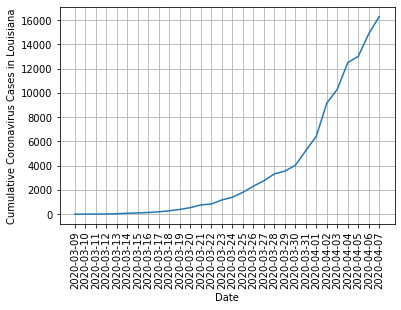

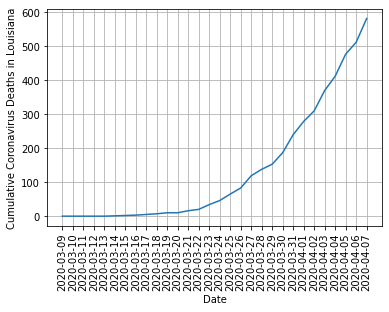

In [23]:
covidByState("Louisiana")
covidByState("Louisiana", "D")

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [24]:
def covidByCounty(county, state, CorD="C"):
    """Function that plots Covid cases or deaths by county"""
    
    file = open("../covidData_4.7.20.csv", "r")
    column_headers = file.readline()
    
    x = []  # dont need dictionary this time. will add data point strait to list since each date will only have one point
    y = []
         
    for line in file:
        l = line.split("\n")
        l = l[0].split(",")
        

        if l[2] == state.capitalize():
            if l[1] == county:
                date = l[0]
                cases = int(l[4])
                deaths = int(l[5])
                
                x.append(date)
                if CorD.upper() == "C":
                    y.append(cases)
                elif CorD.upper() == "D":
                    y.append(deaths)
                else:
                    print("You have entered an incorrected parameter.")
           
    file.close()
                
    if CorD.upper() == "C":
        plt.ylabel("Cumulative Coronavirus Cases in " + county)
    elif CorD.upper() == "D":
        plt.ylabel("Cumulative Coronavirus Deaths in " + county)
        
    plt.xlabel("Date")
    plt.plot(x, y)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    

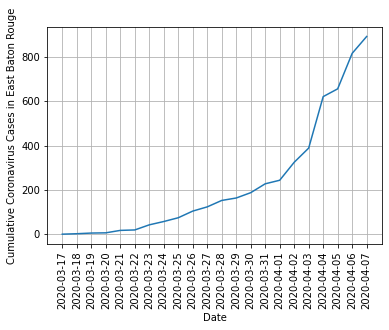

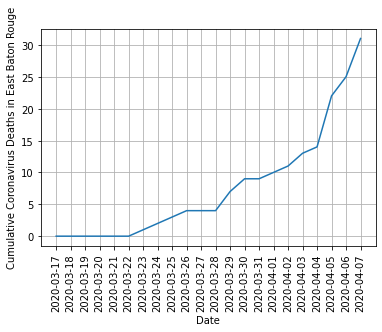

In [25]:
covidByCounty("East Baton Rouge", "Louisiana")
covidByCounty("East Baton Rouge", "Louisiana", "D")